<a href="https://colab.research.google.com/github/printf-bomotayo/Titanic_Data_Preprocessing-Visualization_Project/blob/main/TitanicDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
import os 

Mounted at /content/gdrive


In [ ]:
os.chdir("/content/gdrive/My Drive")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
titanic = pd.read_excel('train.xlsx')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.544332,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic['Age']


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

The code below is to check for the presence and count of missing values in each of the columns.

In [ ]:
titanic.isnull().sum()

# Data Cleaning section
It is observed that Age, Embarked and the Cabin column had missing values, hence the need to cleaning the dataset in these columns.

AGE: The cleaning is done by filling the missing values with the mean age.

EMBARKED: The cleaning is done by filling the missing values with the most occurent data.

CABIN: The cleaning is done by filling the missing values with 0.

In [ ]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [ ]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [ ]:

titanic['Cabin']= titanic['Cabin'].fillna(0)

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Person       891 non-null    object 
 13  Survivor     891 non-null    object 
 14  FamilySize   891 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 104.5+ KB


In [ ]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Person         0
Survivor       0
FamilySize     0
dtype: int64

In [ ]:
titanic.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,0,C


In [ ]:
# We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column
# the need for this is the children and females first policy during an emergency situation
# First let's make a function to sort through the sex 
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex

The above line of code is to  make provision for the identification of children who were also onboard the Titanic by using the criteria of age < 16.

# Adding another column called 'Person' to identify the children present.

In [ ]:
titanic['Person']= titanic[['Age','Sex']].apply(male_female_child, axis=1)

titanic.Age = titanic.Age.astype(int)

titanic.head(10)
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,0,S,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S,female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.45,0,S,female
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C,male
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,0,Q,male


# Histogram plot showing the Age distribtuion of the passengers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


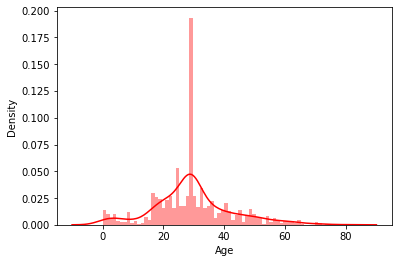

In [ ]:
sns.distplot(titanic['Age'], bins =70, hist = True, kde = True, color='red' )

# Checking the distribution of Males, females and children onboard the Titanic

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


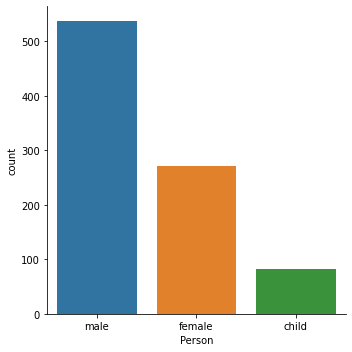

In [ ]:
sns.factorplot('Person', data=titanic, kind="count") ## Let's check gender

# Checking the distribution of passengers across the three classes 1st, 2nd and 3rd class

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


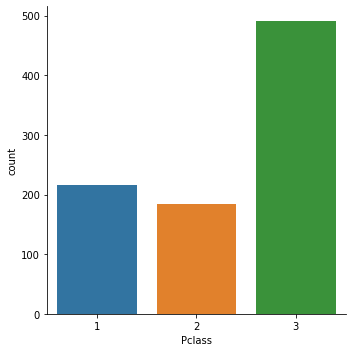

In [ ]:
sns.factorplot('Pclass', data=titanic, kind="count") ## Let's check gender

# Visualizing the relationship between the 'Person' and the 'Class' of ticket

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


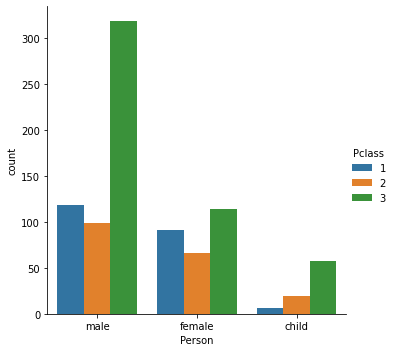

In [ ]:
sns.factorplot('Person', data=titanic, kind="count", hue='Pclass')

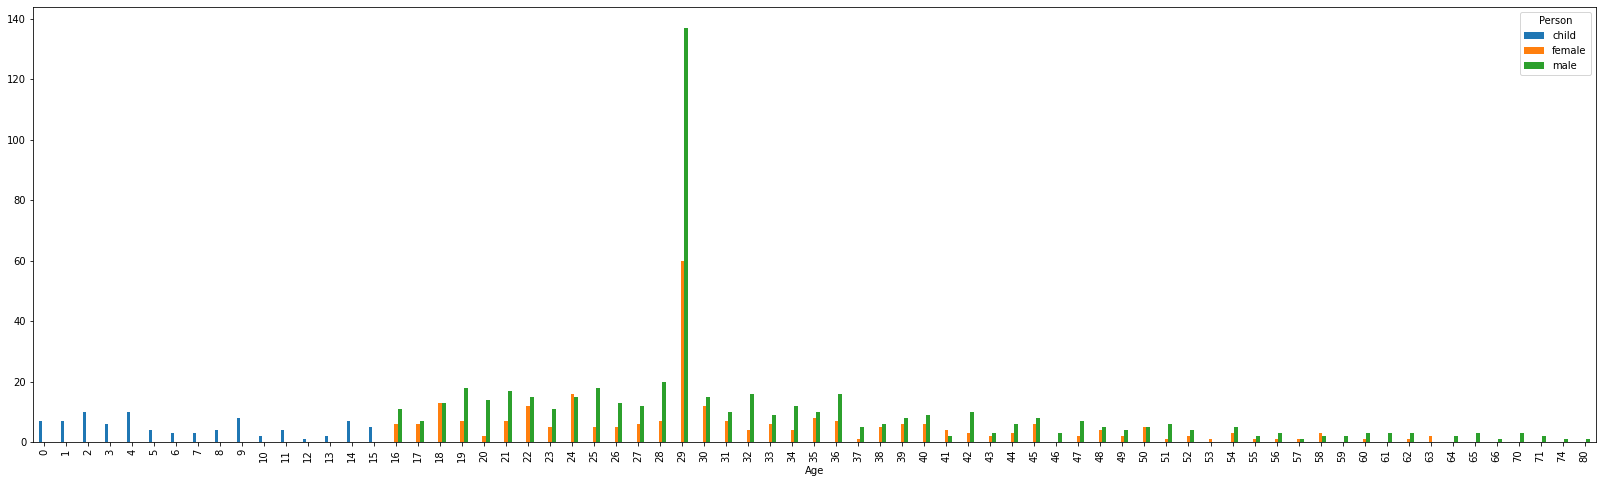

In [26]:
by_Age_Sex = titanic.groupby(['Age','Person'])
Age_Sex = by_Age_Sex.size().unstack()
Age_Sex.plot(kind='bar', figsize=(28, 8))

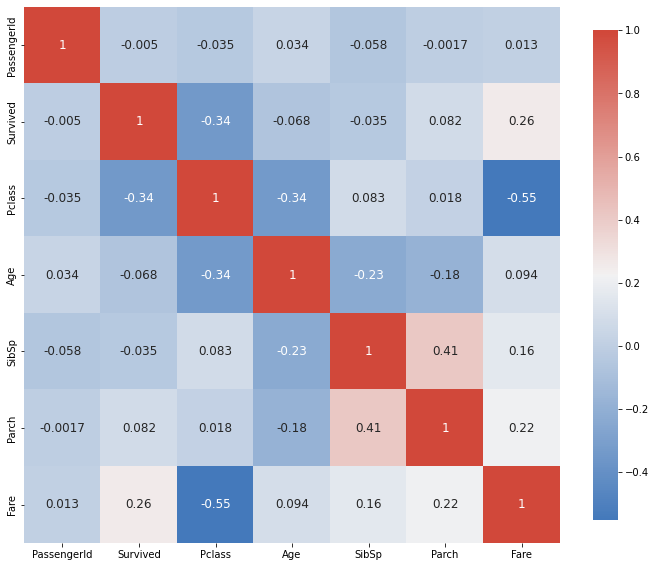

In [ ]:
# plot a correlation map the database df 
def plot_correlation_map(titanic):

  # input the correlation for the database
  corr=titanic.corr()

  # Set up matplot
  s,ax=plt.subplots(figsize=(12,10))

  # set up diverging color map 
  cmap= sns.diverging_palette(250,15,as_cmap=True)

  # 
  s= sns.heatmap(corr,cmap=cmap, square=True, cbar_kws={'shrink':.9}, ax=ax, annot=True, annot_kws={"fontsize":12})

plot_correlation_map(titanic)


# Determining the factors that impacted the chances of survival of individuals onboard the Titanic

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


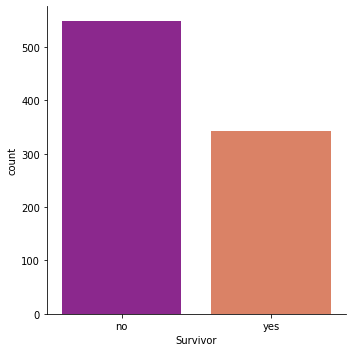

In [ ]:
# Let's start by creating a new column for legibility purposes through mapping
titanic['Survivor'] = titanic.Survived.map({0:'no', 1:'yes'})

# to get a quick overall view of survied vs died. 
sns.factorplot('Survivor', data=titanic, palette='plasma', kind='count')

The above chart shows the the distribution of the survivors in the dataset.

In [ ]:
#titanic = titanic.drop(['Alone'], axis =1)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Survivor,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,0,S,male,no,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,yes,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,0,S,female,yes,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,yes,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,0,S,male,no,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,0,S,male,no,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,female,yes,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,0,S,female,no,With Family
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,male,yes,Alone


# Studying the relationship between 'Pclass' and 'Survived'

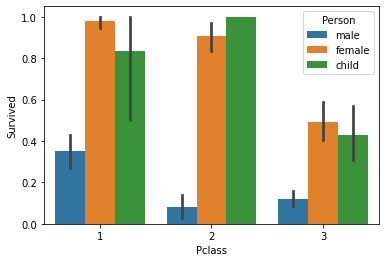

In [ ]:
sns.barplot(x="Pclass", y="Survived", data=titanic, hue='Person')

#Studying the relationship between 'Age' and 'Survived'

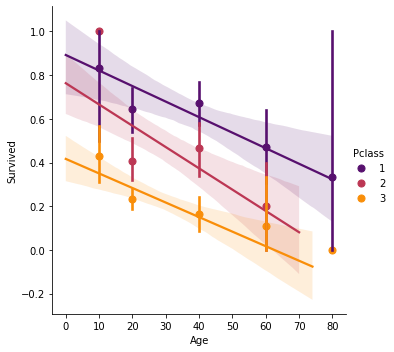

In [ ]:
generations=[10,20,40,60,80]


sns.lmplot(x="Age", y="Survived", data=titanic, hue='Pclass', palette='inferno', x_bins=generations)

The above chart shows that the younger a person is in any of the three classes, the higher their chances of surviving. Also, clearly shown is the fact that individuals in a higher class have an increased chance of survival than individuals in a lower class.

# Studying the relationship between 'Person' and 'Survived'

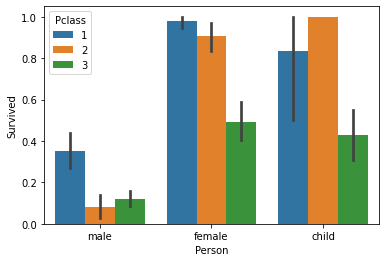

In [ ]:
sns.barplot(x="Person", y="Survived", data=titanic, hue='Pclass')

# Dropping the irrelevant columns [PassengerId, Name, Ticket, Fare,]

In [ ]:
titanic_x = titanic.drop(['PassengerId', 'Ticket', 'Fare'], axis = 1)

titanic_x

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Cabin,Embarked,Survivor,Person
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,0,S,no,male
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,C85,C,yes,female
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,0,S,yes,female
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,C123,S,yes,female
4,0,3,"Allen, Mr. William Henry",male,35,0,0,0,S,no,male
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27,0,0,0,S,no,male
887,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,B42,S,yes,female
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,0,S,no,female
889,1,1,"Behr, Mr. Karl Howell",male,26,0,0,C148,C,yes,male


#  Using the Parch and the SibSp columns to create an additional feature called FamilySize

In [ ]:
# Let's start by adding a new column to define FamilySize

# add the parent/child column with the sibsp column

titanic['FamilySize'] =  titanic.Parch + titanic.SibSp
titanic['FamilySize']


0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: FamilySize, Length: 891, dtype: int64

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Survivor,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,0,S,male,no,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,yes,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,0,S,female,yes,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,yes,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,0,S,male,no,0


In [ ]:
# Look for >0 or ==0 to set alone status
titanic['FamilySize'].loc[titanic['FamilySize'] >0] = 'With Family'
titanic['FamilySize'].loc[titanic['FamilySize'] == 0] = 'Alone'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


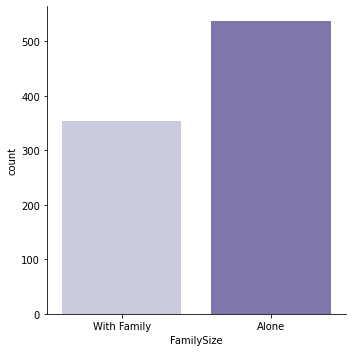

In [ ]:


sns.factorplot('FamilySize', data=titanic, palette='Purples', kind='count')

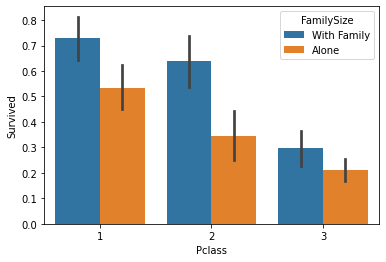

In [ ]:
sns.barplot(x="Pclass", y="Survived", data=titanic, hue='FamilySize')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


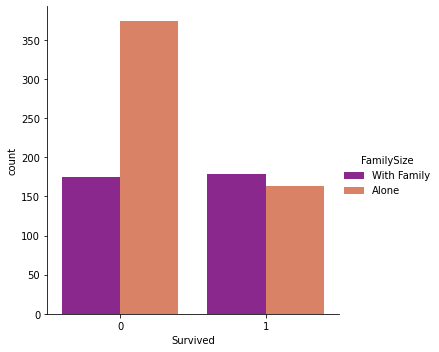

In [ ]:
sns.factorplot('Survived',data=titanic, hue='FamilySize',palette='plasma',kind='count')

# Conclusions 
From the series of analysis and visualization above, we can deduce the following observations;


*   There were more males than females overall onbaord the titanic
*   There were more passengers in the 3rd class than there were in the 1st and 2nd class. Fuirthermore, the majority of the passengers were males in the 3rd class then followed by females in the 3rd class, then more males in the 1st and 2nd class combined than females in the same class.


*   It can also be estimated that there more passengers that fall within the age group of 29-30  

*   Overall, less people survived.

*   It can also be deduced that females and children had a higher survival rate than men.
*   The younger a person was in any of the three classes, the higher their chances of survival. In addition, individuals in a higher class had an increased chance of survival than individuals in a lower class.


*   More passengers onboard the titanic took the trip alone than passengers who took the trip with their family/friends.


*   People who took the trip with their family/friends had a higher survival rate than passengers who took the trip alone across the three classes.


